In [1]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [2]:
# Target search for MDM2-p53
target = new_client.target
target_query = target.search('Alzheimer')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Rattus norvegicus,Amyloid beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
2,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
3,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


In [3]:
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL2487'

In [14]:

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")


In [15]:
Alzh_data = pd.DataFrame.from_dict(res)
Alzh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   activity_comment           330 non-null    object
 1   activity_id                1448 non-null   int64 
 2   activity_properties        1448 non-null   object
 3   assay_chembl_id            1448 non-null   object
 4   assay_description          1448 non-null   object
 5   assay_type                 1448 non-null   object
 6   assay_variant_accession    0 non-null      object
 7   assay_variant_mutation     0 non-null      object
 8   bao_endpoint               1448 non-null   object
 9   bao_format                 1448 non-null   object
 10  bao_label                  1448 non-null   object
 11  canonical_smiles           1448 non-null   object
 12  data_validity_comment      53 non-null     object
 13  data_validity_description  53 non-null     object
 14  document

In [12]:
Alzh_data.to_csv('Alzh_data_bioactivity_data_raw.csv', index=False)
Alzh_data

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,Not Active,23349223,[],CHEMBL4882623,Aβ40 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,1600.0
1444,Active,23349820,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4882625,Aβ42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,31.0
1445,Active,23349821,[],CHEMBL4882626,Aβ40 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,131.0
1446,Not Active,23349832,[],CHEMBL4882625,Aβ42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,µM,None,None,10.0


In [16]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
Alzh_data_s= Alzh_data[selection]
Alzh_data_s.to_csv('Alzh_bioactivity_data.csv', index=False)
Alzh_data_s

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1443,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0
1444,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0
1445,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,131.0
1446,CHEMBL4534005,COc1cc(-c2cn(C3CCc4ccccc4N(CC(F)(F)F)C3=O)nn2)...,10.0


In [14]:
Alzh_data2 = Alzh_data_s.drop_duplicates(['molecule_chembl_id'])
Alzh_data2

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1439,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,1380.0
1440,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5
1443,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0
1444,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0


In [15]:
Alzh_data2 = Alzh_data2.astype({'standard_value': 'float64'})
Alzh_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1446
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1213 non-null   object 
 1   canonical_smiles    1213 non-null   object 
 2   standard_value      1073 non-null   float64
dtypes: float64(1), object(2)
memory usage: 37.9+ KB


In [16]:
bioactivity_threshold = []
for i in Alzh_data2.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [17]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
bioactivity_class

0       intermediate
1       intermediate
2       intermediate
3           inactive
4           inactive
            ...     
1208    intermediate
1209          active
1210    intermediate
1211          active
1212          active
Name: class, Length: 1213, dtype: object

In [18]:
mol_id = []
for i in Alzh_data2.molecule_chembl_id:
    mol_id.append(i)
canonical_smiles = []
for i in Alzh_data2.canonical_smiles:
    canonical_smiles.append(i)   
standard_value = []
for i in Alzh_data2.standard_value:
    standard_value.append(i)
    
selection = list(zip(mol_id, canonical_smiles, standard_value, bioactivity_class))
Alzh_data3 = pd.DataFrame( selection, columns = ['mol_id', 'canonical_smiles', 'standard_value', 'bioactivity_class'])
Alzh_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mol_id             1213 non-null   object 
 1   canonical_smiles   1213 non-null   object 
 2   standard_value     1073 non-null   float64
 3   bioactivity_class  1213 non-null   object 
dtypes: float64(1), object(3)
memory usage: 38.0+ KB


In [21]:
Alzh_data4 = Alzh_data3.dropna()
Alzh_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1212
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mol_id             1073 non-null   object 
 1   canonical_smiles   1073 non-null   object 
 2   standard_value     1073 non-null   float64
 3   bioactivity_class  1073 non-null   object 
dtypes: float64(1), object(3)
memory usage: 41.9+ KB


In [22]:
Alzh_data4.to_csv('Alzh_data4_bioactivity.csv', index=False)

In [1]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
Alzh_data4 = pd.read_csv('Alzh_data4_bioactivity.csv')
Alzh_data4

,mol_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1068,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,1380.0,intermediate
1069,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active
1070,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate
1071,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active


In [3]:
 #Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors


In [4]:
df_lipinski = lipinski(Alzh_data4.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1068,550.681,4.08700,2.0,8.0
1069,517.925,4.66920,1.0,4.0
1070,569.114,6.21910,1.0,5.0
1071,514.483,4.66972,0.0,7.0


In [5]:
Alzh_data_lip = pd.concat([Alzh_data4,df_lipinski], axis=1)
Alzh_data_lip 

,mol_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
1068,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,1380.0,intermediate,550.681,4.08700,2.0,8.0
1069,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active,517.925,4.66920,1.0,4.0
1070,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate,569.114,6.21910,1.0,5.0
1071,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active,514.483,4.66972,0.0,7.0


In [6]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [7]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x


In [8]:
df_norm = norm_value(Alzh_data_lip)
df_norm.to_csv('Alzh_data_norm.csv', index=False)

/tmp/ipykernel_73167/1998879194.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


In [9]:
df_final = pIC50(Alzh_data_lip)
df_final

/tmp/ipykernel_73167/911978885.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,mol_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...,...
1068,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,1380.0,intermediate,550.681,4.08700,2.0,8.0,5.860121
1069,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active,517.925,4.66920,1.0,4.0,9.301030
1070,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate,569.114,6.21910,1.0,5.0,5.795880
1071,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active,514.483,4.66972,0.0,7.0,7.508638


In [10]:
df_final.to_csv('Alzh_data_final.csv', index=False)

In [11]:
Alzh_data5 = df_final[df_final['bioactivity_class'] != 'intermediate']
Alzh_data5

,mol_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,305000.0,inactive,244.265,3.68080,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,75000.0,inactive,313.155,4.98760,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,77000.0,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...,...
1065,CHEMBL4877566,COC(=O)c1c(C)c(C/C=C(\C)CC/C=C(\C)CCC=C(C)C)c(...,50300.0,inactive,416.558,6.16312,2.0,5.0,4.298432
1066,CHEMBL378225,C[C@@H](NC(=O)c1cc(C(=O)N[C@@H](Cc2ccccc2)[C@H...,100000.0,inactive,578.735,3.02740,4.0,6.0,4.000000
1069,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active,517.925,4.66920,1.0,4.0,9.301030
1071,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active,514.483,4.66972,0.0,7.0,7.508638


In [12]:
Alzh_data5.to_csv('Alzh_data5_final_pIC50.csv')

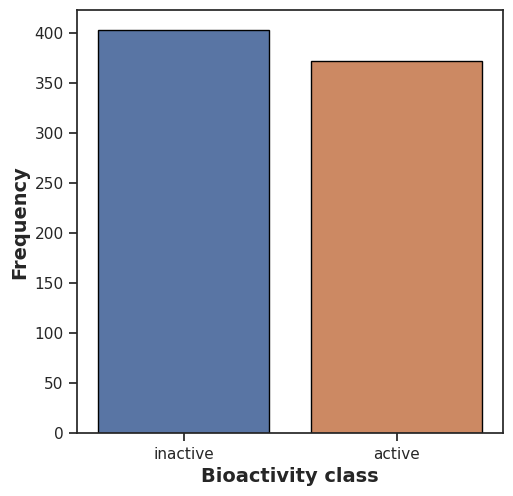

In [13]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=Alzh_data5, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

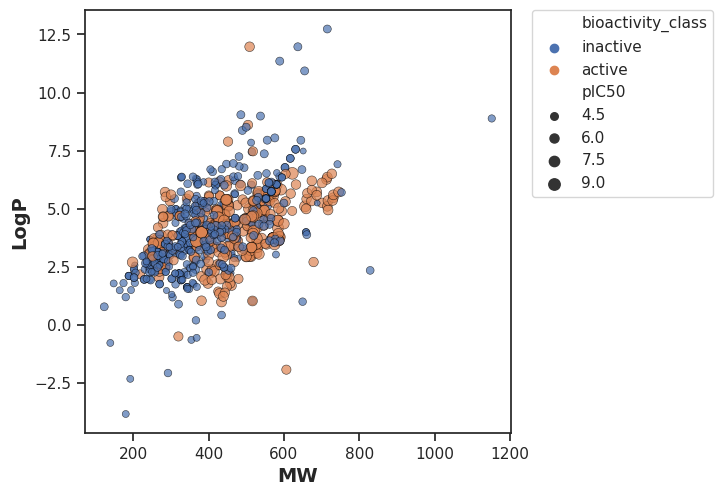

In [14]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=Alzh_data5, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

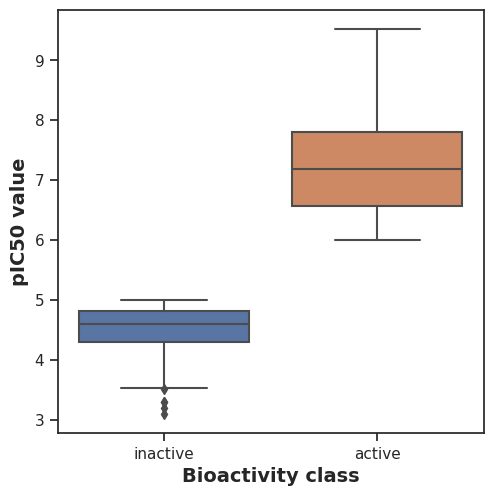

In [15]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = Alzh_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [16]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = Alzh_data5[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = Alzh_data5[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [17]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,149916.0,4.420603e-128,0.05,Different distribution (reject H0)


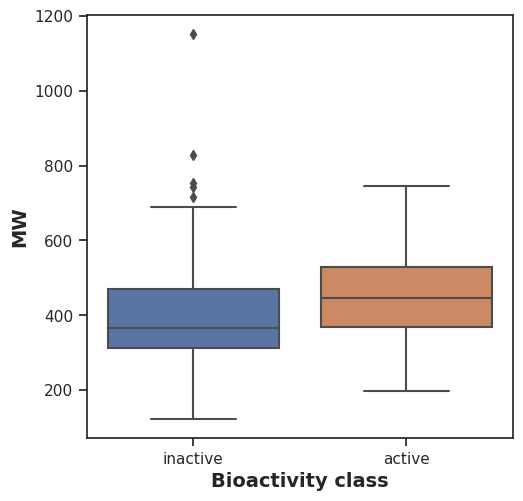

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = Alzh_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')


In [19]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,93599.5,2.138118e-09,0.05,Different distribution (reject H0)


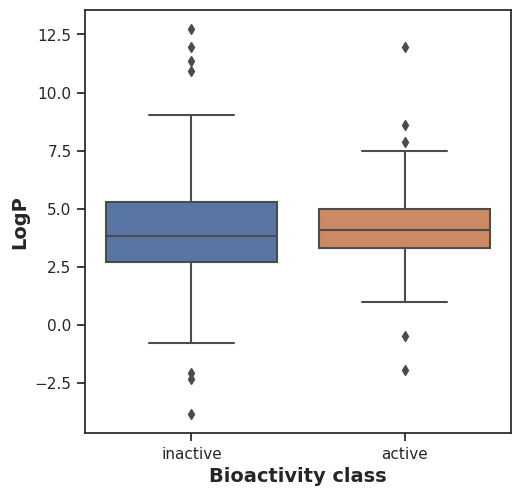

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = Alzh_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [21]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,80325.0,0.084787,0.05,Same distribution (fail to reject H0)


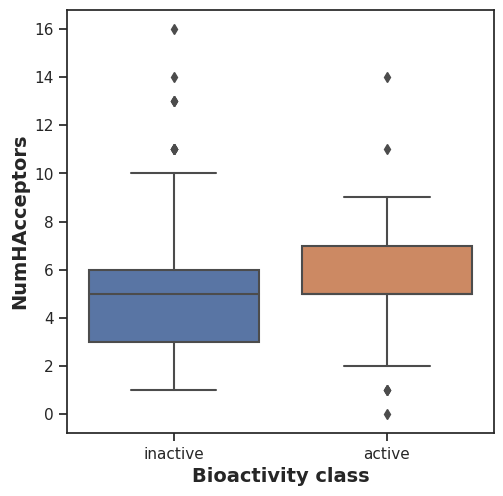

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = Alzh_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [23]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,91755.0,4.181379e-08,0.05,Different distribution (reject H0)


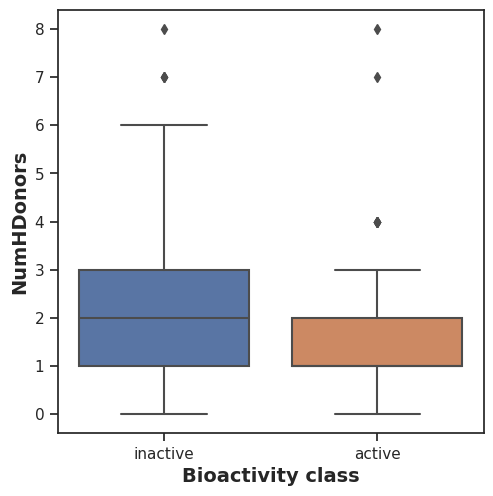

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = Alzh_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [25]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,54611.0,1.463590e-11,0.05,Different distribution (reject H0)


In [26]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: Alzh_data5_final_pIC50.csv (deflated 76%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: Mss_bioactivity_data.csv (deflated 83%)
updating: Alzh_data_norm.csv (deflated 79%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: plot_MW_vs_LogP.pdf (deflated 5%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: Alzh_data_final.csv (deflated 77%)
updating: plot_ic50.pdf (deflated 36%)
updating: Alzh_data4_bioactivity.csv (deflated 82%)
updating: plot_LogP.pdf (deflated 40%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: Alzh_data_bioactivity_data_raw.csv (deflated 92%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: mannwhitneyu_pIC50.csv (deflated 11%)
updating: mannwhitneyu_LogP.csv (deflated 9%)
updating: plot_MW.pdf (deflated 38%)
  adding: Alzh_data3.csv (deflated 85%)
  adding: descriptor_list.csv (deflated 95%)
  adding: Alzh_pIC50_pubchem_fp.csv (deflated 96%)
  adding: 

In [1]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
Alzh_data5 = pd.read_csv('Alzh_data5.csv')
Alzh_data5

,Unnamed: 0,mol_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0,4.958607
1,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0,5.000000
2,5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,305000.0,inactive,244.265,3.68080,1.0,1.0,3.515700
3,6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,75000.0,inactive,313.155,4.98760,1.0,1.0,4.124939
4,7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,77000.0,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...,...,...
770,1065,CHEMBL4877566,COC(=O)c1c(C)c(C/C=C(\C)CC/C=C(\C)CCC=C(C)C)c(...,50300.0,inactive,416.558,6.16312,2.0,5.0,4.298432
771,1066,CHEMBL378225,C[C@@H](NC(=O)c1cc(C(=O)N[C@@H](Cc2ccccc2)[C@H...,100000.0,inactive,578.735,3.02740,4.0,6.0,4.000000
772,1069,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active,517.925,4.66920,1.0,4.0,9.301030
773,1071,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active,514.483,4.66972,0.0,7.0,7.508638


In [3]:
selection = ['canonical_smiles','mol_id']
Alzh_data5_selection = Alzh_data5[selection]
Alzh_data5_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [4]:
! cat padel.sh
! bash padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv
Processing CHEMBL74874 in molecule.smi (1/775). 
Processing CHEMBL75183 in molecule.smi (2/775). 
Processing CHEMBL196279 in molecule.smi (4/775). 
Processing CHEMBL563 in molecule.smi (3/775). 
Processing CHEMBL195970 in molecule.smi (5/775). 
Processing CHEMBL264006 in molecule.smi (6/775). 
Processing CHEMBL193971 in molecule.smi (7/775). 
Processing CHEMBL194274 in molecule.smi (8/775). 
Processing CHEMBL196321 in molecule.smi (9/775). Average speed: 2.44 s/mol.
Processing CHEMBL196322 in molecule.smi (10/775). Average speed: 2.47 s/mol.
Processing CHEMBL197202 in molecule.smi (12/775). Average speed: 0.65 s/mol.
Processing CHEMBL380778 in molecule.smi (11/775). Average speed: 0.85 s/mol.
Processing CHEMBL196246 in molecule.smi (13/775). Average speed: 0.

Processing CHEMBL247932 in molecule.smi (108/775). Average speed: 0.10 s/mol.
Processing CHEMBL247930 in molecule.smi (110/775). Average speed: 0.10 s/mol.
Processing CHEMBL247931 in molecule.smi (109/775). Average speed: 0.10 s/mol.
Processing CHEMBL247328 in molecule.smi (111/775). Average speed: 0.10 s/mol.
Processing CHEMBL247927 in molecule.smi (112/775). Average speed: 0.10 s/mol.
Processing CHEMBL391205 in molecule.smi (113/775). Average speed: 0.10 s/mol.
Processing CHEMBL247725 in molecule.smi (114/775). Average speed: 0.10 s/mol.
Processing CHEMBL247674 in molecule.smi (115/775). Average speed: 0.10 s/mol.
Processing CHEMBL247524 in molecule.smi (116/775). Average speed: 0.10 s/mol.
Processing CHEMBL394713 in molecule.smi (117/775). Average speed: 0.10 s/mol.
Processing CHEMBL492217 in molecule.smi (119/775). Average speed: 0.10 s/mol.
Processing CHEMBL491203 in molecule.smi (120/775). Average speed: 0.10 s/mol.
Processing CHEMBL509088 in molecule.smi (121/775). Average speed

Processing CHEMBL2402074 in molecule.smi (214/775). Average speed: 0.07 s/mol.
Processing CHEMBL2402161 in molecule.smi (215/775). Average speed: 0.07 s/mol.
Processing CHEMBL2402157 in molecule.smi (216/775). Average speed: 0.07 s/mol.
Processing CHEMBL2402163 in molecule.smi (217/775). Average speed: 0.07 s/mol.
Processing CHEMBL2402162 in molecule.smi (218/775). Average speed: 0.07 s/mol.
Processing CHEMBL129795 in molecule.smi (219/775). Average speed: 0.07 s/mol.
Processing CHEMBL2408097 in molecule.smi (220/775). Average speed: 0.07 s/mol.
Processing CHEMBL2408095 in molecule.smi (222/775). Average speed: 0.07 s/mol.
Processing CHEMBL2408096 in molecule.smi (221/775). Average speed: 0.07 s/mol.
Processing CHEMBL258752 in molecule.smi (223/775). Average speed: 0.07 s/mol.
Processing CHEMBL2408094 in molecule.smi (224/775). Average speed: 0.07 s/mol.
Processing CHEMBL2408092 in molecule.smi (225/775). Average speed: 0.07 s/mol.
Processing CHEMBL2408091 in molecule.smi (226/775). Av

Processing CHEMBL3582129 in molecule.smi (318/775). Average speed: 0.08 s/mol.
Processing CHEMBL3582130 in molecule.smi (319/775). Average speed: 0.08 s/mol.
Processing CHEMBL3582133 in molecule.smi (320/775). Average speed: 0.08 s/mol.
Processing CHEMBL549959 in molecule.smi (321/775). Average speed: 0.08 s/mol.
Processing CHEMBL3593276 in molecule.smi (322/775). Average speed: 0.08 s/mol.
Processing CHEMBL3593280 in molecule.smi (324/775). Average speed: 0.08 s/mol.
Processing CHEMBL3593277 in molecule.smi (323/775). Average speed: 0.08 s/mol.
Processing CHEMBL3593282 in molecule.smi (325/775). Average speed: 0.08 s/mol.
Processing CHEMBL3622510 in molecule.smi (327/775). Average speed: 0.08 s/mol.
Processing CHEMBL3594077 in molecule.smi (326/775). Average speed: 0.08 s/mol.
Processing CHEMBL3740785 in molecule.smi (328/775). Average speed: 0.08 s/mol.
Processing CHEMBL3741682 in molecule.smi (329/775). Average speed: 0.08 s/mol.
Processing CHEMBL3742121 in molecule.smi (330/775). A

Processing CHEMBL3883958 in molecule.smi (424/775). Average speed: 0.07 s/mol.
Processing CHEMBL3672401 in molecule.smi (423/775). Average speed: 0.07 s/mol.
Processing CHEMBL3944195 in molecule.smi (425/775). Average speed: 0.07 s/mol.
Processing CHEMBL3913721 in molecule.smi (426/775). Average speed: 0.07 s/mol.
Processing CHEMBL1086286 in molecule.smi (427/775). Average speed: 0.07 s/mol.
Processing CHEMBL1086287 in molecule.smi (428/775). Average speed: 0.07 s/mol.
Processing CHEMBL3659993 in molecule.smi (429/775). Average speed: 0.07 s/mol.
Processing CHEMBL3659994 in molecule.smi (430/775). Average speed: 0.07 s/mol.
Processing CHEMBL3659995 in molecule.smi (432/775). Average speed: 0.07 s/mol.
Processing CHEMBL1090210 in molecule.smi (431/775). Average speed: 0.07 s/mol.
Processing CHEMBL3659992 in molecule.smi (433/775). Average speed: 0.07 s/mol.
Processing CHEMBL1090209 in molecule.smi (434/775). Average speed: 0.07 s/mol.
Processing CHEMBL1778349 in molecule.smi (435/775). 

Processing CHEMBL4115329 in molecule.smi (528/775). Average speed: 0.07 s/mol.
Processing CHEMBL4109969 in molecule.smi (527/775). Average speed: 0.07 s/mol.
Processing CHEMBL4106556 in molecule.smi (529/775). Average speed: 0.07 s/mol.
Processing CHEMBL4107875 in molecule.smi (530/775). Average speed: 0.07 s/mol.
Processing CHEMBL4112705 in molecule.smi (531/775). Average speed: 0.07 s/mol.
Processing CHEMBL4115141 in molecule.smi (532/775). Average speed: 0.07 s/mol.
Processing CHEMBL4108335 in molecule.smi (533/775). Average speed: 0.07 s/mol.
Processing CHEMBL4111699 in molecule.smi (534/775). Average speed: 0.07 s/mol.
Processing CHEMBL4109860 in molecule.smi (535/775). Average speed: 0.07 s/mol.
Processing CHEMBL4110497 in molecule.smi (536/775). Average speed: 0.07 s/mol.
Processing CHEMBL2386726 in molecule.smi (537/775). Average speed: 0.07 s/mol.
Processing CHEMBL4110655 in molecule.smi (538/775). Average speed: 0.07 s/mol.
Processing CHEMBL4113786 in molecule.smi (539/775). 

Processing CHEMBL4217978 in molecule.smi (632/775). Average speed: 0.07 s/mol.
Processing CHEMBL4207221 in molecule.smi (633/775). Average speed: 0.07 s/mol.
Processing CHEMBL451753 in molecule.smi (634/775). Average speed: 0.07 s/mol.
Processing CHEMBL4226684 in molecule.smi (635/775). Average speed: 0.07 s/mol.
Processing CHEMBL4225384 in molecule.smi (636/775). Average speed: 0.07 s/mol.
Processing CHEMBL4226959 in molecule.smi (637/775). Average speed: 0.07 s/mol.
Processing CHEMBL4226332 in molecule.smi (638/775). Average speed: 0.07 s/mol.
Processing CHEMBL4226906 in molecule.smi (639/775). Average speed: 0.07 s/mol.
Processing CHEMBL4226598 in molecule.smi (640/775). Average speed: 0.07 s/mol.
Processing CHEMBL4227708 in molecule.smi (642/775). Average speed: 0.07 s/mol.
Processing CHEMBL4226641 in molecule.smi (641/775). Average speed: 0.07 s/mol.
Processing CHEMBL4227244 in molecule.smi (643/775). Average speed: 0.07 s/mol.
Processing CHEMBL4226530 in molecule.smi (644/775). A

Processing CHEMBL4868565 in molecule.smi (737/775). Average speed: 0.07 s/mol.
Processing CHEMBL4874507 in molecule.smi (738/775). Average speed: 0.07 s/mol.
Processing CHEMBL4876813 in molecule.smi (740/775). Average speed: 0.07 s/mol.
Processing CHEMBL4869616 in molecule.smi (739/775). Average speed: 0.07 s/mol.
Processing CHEMBL4863014 in molecule.smi (741/775). Average speed: 0.07 s/mol.
Processing CHEMBL4846539 in molecule.smi (742/775). Average speed: 0.07 s/mol.
Processing CHEMBL4458591 in molecule.smi (743/775). Average speed: 0.07 s/mol.
Processing CHEMBL4865997 in molecule.smi (744/775). Average speed: 0.07 s/mol.
Processing CHEMBL4850411 in molecule.smi (745/775). Average speed: 0.07 s/mol.
Processing CHEMBL4873939 in molecule.smi (746/775). Average speed: 0.07 s/mol.
Processing CHEMBL4865817 in molecule.smi (747/775). Average speed: 0.07 s/mol.
Processing CHEMBL4850080 in molecule.smi (748/775). Average speed: 0.07 s/mol.
Processing CHEMBL4860892 in molecule.smi (749/775). 

In [5]:
X_des = pd.read_csv('descriptors_output.csv')
X_des

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL75183,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL563,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL193971,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL74874,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL196279,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,CHEMBL4877566,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,CHEMBL1091513,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
772,CHEMBL3609637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
773,CHEMBL4534005,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_des = X_des.drop(columns=['Name'])
X_des

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
771,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
772,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
773,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
YIC= Alzh_data5['pIC50']
YIC

0      4.958607
1      5.000000
2      3.515700
3      4.124939
4      4.113509
         ...   
770    4.298432
771    4.000000
772    9.301030
773    7.508638
774    8.000000
Name: pIC50, Length: 775, dtype: float64

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [9]:
data= pd.concat([X_des,YIC], axis=1)
data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.298432
771,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
772,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.301030
773,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638


In [10]:
data.to_csv('Alzh_pIC50_pubchem_fp.csv', index=False)

In [11]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.8
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(X_des)
X = X_des[X_des.columns[sel.get_support(indices=True)]] 
X

,PubchemFP2,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,...,PubchemFP712,PubchemFP714,PubchemFP735,PubchemFP756,PubchemFP758,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP819,PubchemFP821
0,1,1,0,0,1,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,1,1,1,...,1,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,1,0,0,0,1,1,0,0,0,0,...,1,1,1,1,0,1,1,1,1,0
771,1,1,0,0,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
772,1,1,1,1,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1
773,1,1,1,1,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1


In [12]:
X.to_csv('descriptor_list.csv', index =False)

In [13]:
X_train, X_test, YIC_train, YIC_test = train_test_split(X, YIC, test_size=0.2)

In [14]:
X_test.shape, YIC_test.shape

((155, 194), (155,))

In [15]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, YIC_train)
r2 = model.score(X_test, YIC_test)
r2

0.7723227893938825

In [16]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

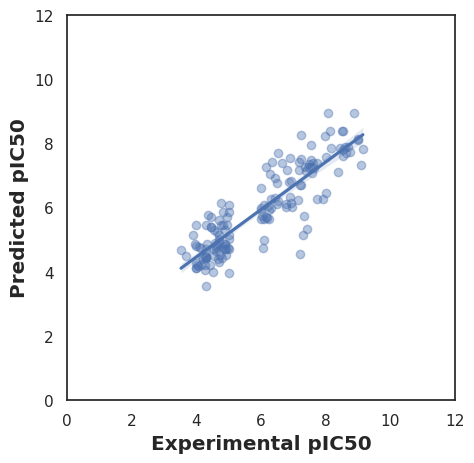

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = YIC_test, y = Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/home/wessam/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [19]:
X_train, X_test, YIC_train, YIC_test = train_test_split(X, YIC, test_size=0.2, random_state=42)

In [20]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, YIC_train, YIC_test)

100%|███████████████████████████████████████████| 43/43 [00:13<00:00,  3.18it/s]


In [21]:
train

,R-Squared,RMSE,Time Taken
Model,,,
KNeighborsRegressor,0.73,0.82,0.02
SVR,0.73,0.82,0.06
GradientBoostingRegressor,0.72,0.83,0.33
NuSVR,0.72,0.84,0.06
RandomForestRegressor,0.70,0.87,0.75
LGBMRegressor,0.69,0.87,0.07
HistGradientBoostingRegressor,0.69,0.87,0.49
BaggingRegressor,0.68,0.89,0.09
XGBRegressor,0.67,0.91,0.13


In [22]:
test

,R-Squared,RMSE,Time Taken
Model,,,
KNeighborsRegressor,0.73,0.82,0.02
SVR,0.73,0.82,0.06
GradientBoostingRegressor,0.72,0.83,0.33
NuSVR,0.72,0.84,0.06
RandomForestRegressor,0.70,0.87,0.75
LGBMRegressor,0.69,0.87,0.07
HistGradientBoostingRegressor,0.69,0.87,0.49
BaggingRegressor,0.68,0.89,0.09
XGBRegressor,0.67,0.91,0.13


[(0.0, 1.0)]

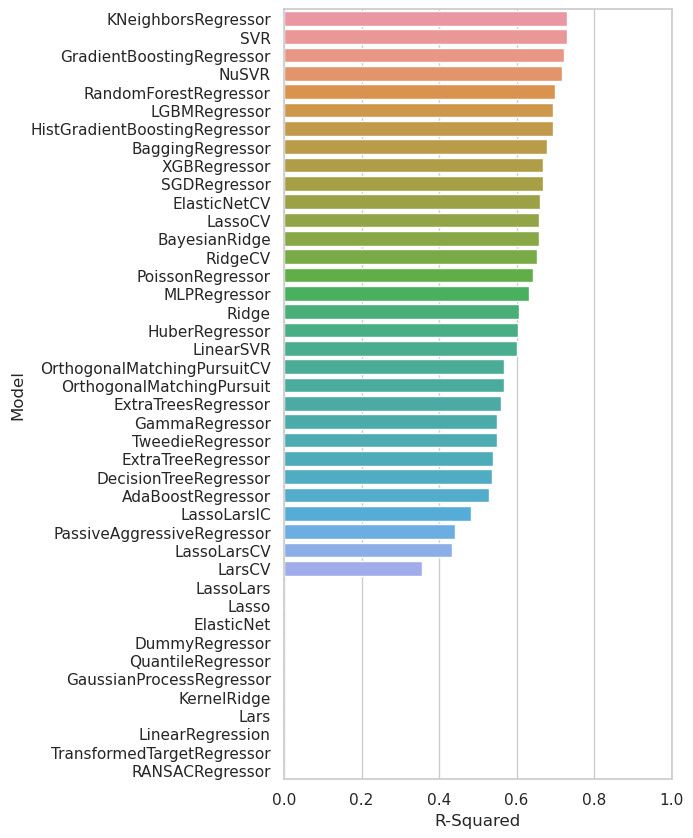

In [23]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

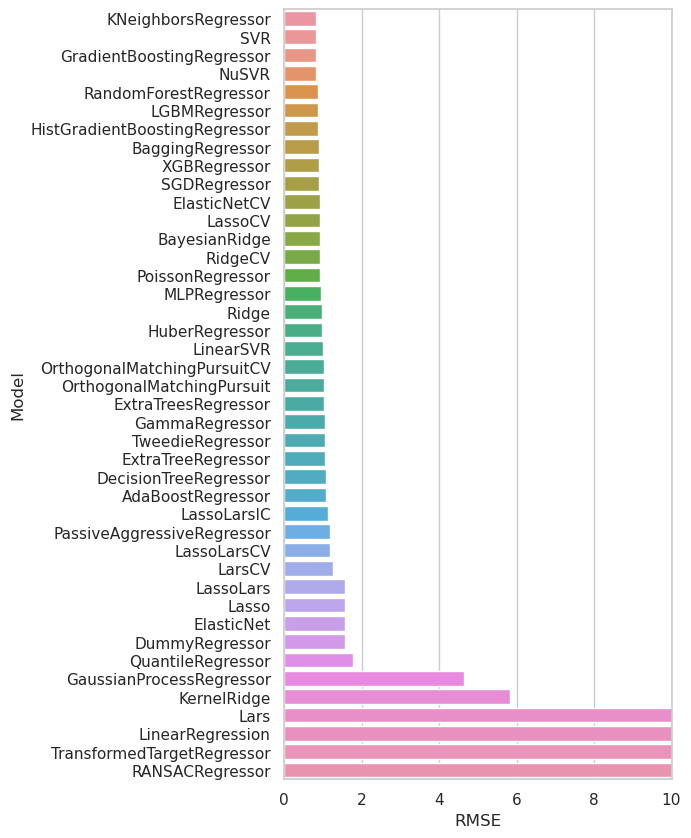

In [24]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

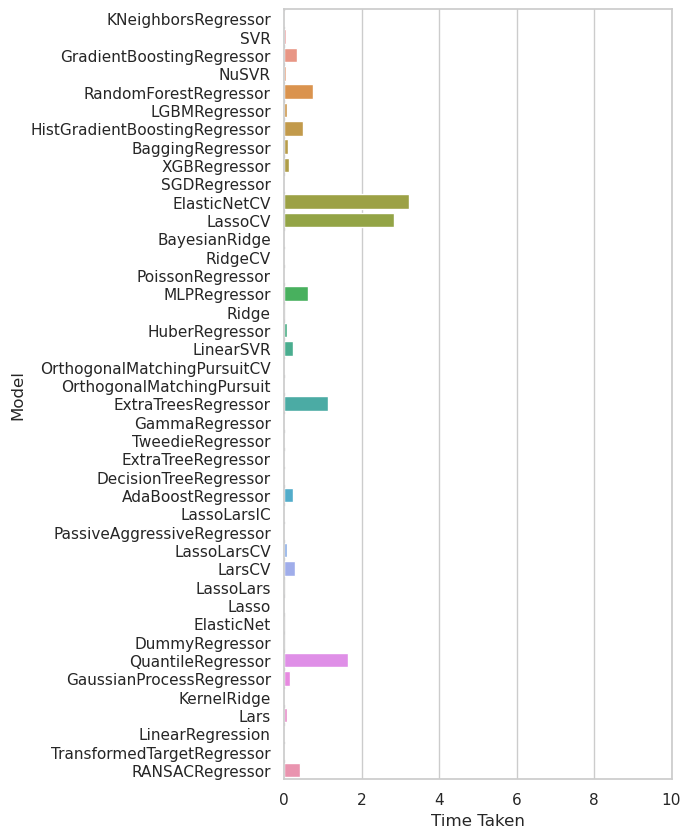

In [25]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, YIC)
r2 = model.score(X, YIC)
r2

0.9158742795805989

In [28]:
Y_pred = model.predict(X)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(YIC, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(YIC, Y_pred))

Mean squared error (MSE): 0.19
Coefficient of determination (R^2): 0.92


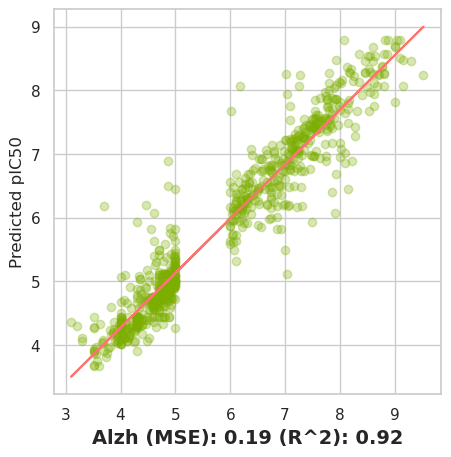

In [29]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,5))
plt.scatter(x=YIC, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(YIC, Y_pred, 1)
p = np.poly1d(z)

plt.plot(YIC,p(YIC),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.xlabel('Alzh'+' '+ '(MSE): 0.19' +' '+'(R^2): 0.92', fontsize=14, fontweight='bold')

plt.savefig('Predicted vs exprimental.pdf')

In [30]:
import pickle
pickle.dump(model, open('Alzh.pkl', 'wb'))